## Dimension reduction methods

Применим PCA к трёхмерному датасету (client_segmentation.csv) по оттоку, где:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(3)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0


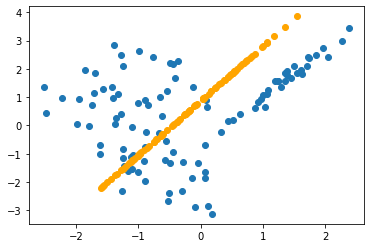

In [7]:
plt.scatter(df_source.call_diff, df_source.traffic_diff)

from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X[:, [0,2]])
X_pca = pca.transform(X[:, [0,2]])

X_viz = pca.inverse_transform(X_pca)

plt.scatter(X_viz[:,0], X_viz[:,1], c='orange')
plt.show()

Теперь применим PCA к трёхмерному датасету и сожмём данные до размерности $n=2$.

Для наглядности визуализируем наши трёхмерные данные:

C:\Users\user\AppData\Local\Temp\ipykernel_10116\4198997527.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=35, azim=115)


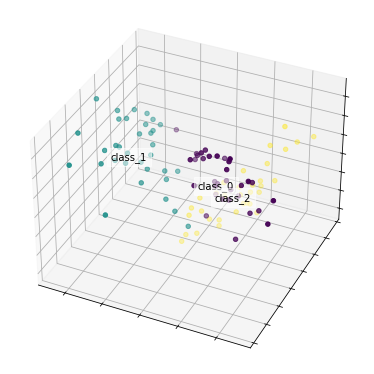

In [14]:
import numpy as np

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=35, azim=115)
plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

Понизим размерность:

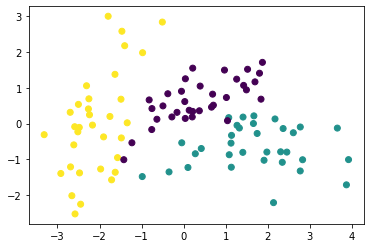

In [18]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

## PCA & SVD с изображениями

<class 'numpy.ndarray'> (2160, 1215, 3)


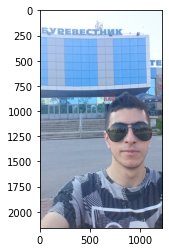

In [19]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('sur.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb

<class 'numpy.ndarray'> (2160, 1215)


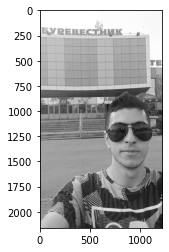

In [26]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))  # Берётся среднее трёх цветов RGB
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

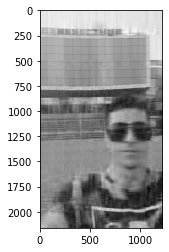

In [23]:
from sklearn.decomposition import TruncatedSVD

svd_img_g = TruncatedSVD(n_components=15).fit(img_gray)
svd_img_g_transformed = svd_img_g.transform(img_gray)
svd_img_g_restored = svd_img_g.inverse_transform(svd_img_g_transformed)

imshow(svd_img_g_restored, cmap='gray');

## t-SNE

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)

df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

Вычислим скор baseline модели (по тестовым данным):

In [30]:
eval_model(X, y)

Accuracy: 0.80000


Применим PCA и t-SNE преобразования к матрице X, посчитаем точность:

In [38]:
from sklearn.manifold import TSNE

pca_model = PCA(n_components=2).fit_transform(X)
tsne_model = TSNE(n_components=2).fit_transform(X)

print(eval_model(pca_model, y))
print(eval_model(tsne_model, y))

C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Accuracy: 0.83333
None
Accuracy: 0.96667
None
